In [18]:
##SCENIRIO

Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
Introduction
●To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.
Descriptive Analytics for Numerical Columns
●Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
●Steps:
Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
Identify numerical columns in the dataset.
Calculate the mean, median, mode, and standard deviation for these columns.
Provide a brief interpretation of these statistics.
Data Visualization
●Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
●Histograms:
Plot histograms for each numerical column.
Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
●Boxplots:
Create boxplots for numerical variables to identify outliers and the interquartile range.
Discuss any findings, such as extreme values or unusual distributions.
●Bar Chart Analysis for Categorical Column:
Identify categorical columns in the dataset.
Create bar charts to visualize the frequency or count of each category.
Analyze the distribution of categories and provide insights.
Standardization of Numerical Variables
●Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
●Steps:
Explain the concept of standardization (z-score normalization).
Standardize the numerical columns using the formula: z=x-mu/sigma

​Show before and after comparisons of the data distributions.
Conversion of Categorical Data into Dummy Variables
●Objective: To transform categorical variables into a format that can be provided to ML algorithms.
●Steps:
Discuss the need for converting categorical data into dummy variables (one-hot encoding).
Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
Display a portion of the transformed dataset.
Conclusion
●Summarize the key findings from the descriptive analytics and data visualizations.
●Reflect on the importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.


In [22]:
## IMPORTING PACKAGES

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("sales_data_with_discounts.csv")
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


ckecking null values

In [3]:
df.isnull().sum()

,0
Date,0
Day,0
SKU,0
City,0
Volume,0
BU,0
Brand,0
Model,0
Avg Price,0
Total Sales Value,0


There is no null values

checking dupllicate values

In [4]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
445,False
446,False
447,False
448,False


No duplicate values in the data set

In [7]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


finding the data types in the data set

In [6]:
df.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


separate the data into numerical and categorical

In [8]:
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
categorical_cols = ['Day', 'City', 'BU', 'Brand']

In [9]:
# Descriptive Statistics
desc_stats = df[numerical_cols].describe().T
desc_stats['mode'] = df[numerical_cols].mode().iloc[0]
print("Descriptive Statistics:\n")
print(desc_stats[['mean', '50%', 'mode', 'std']])



Descriptive Statistics:

                           mean          50%          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


data visulization using hist

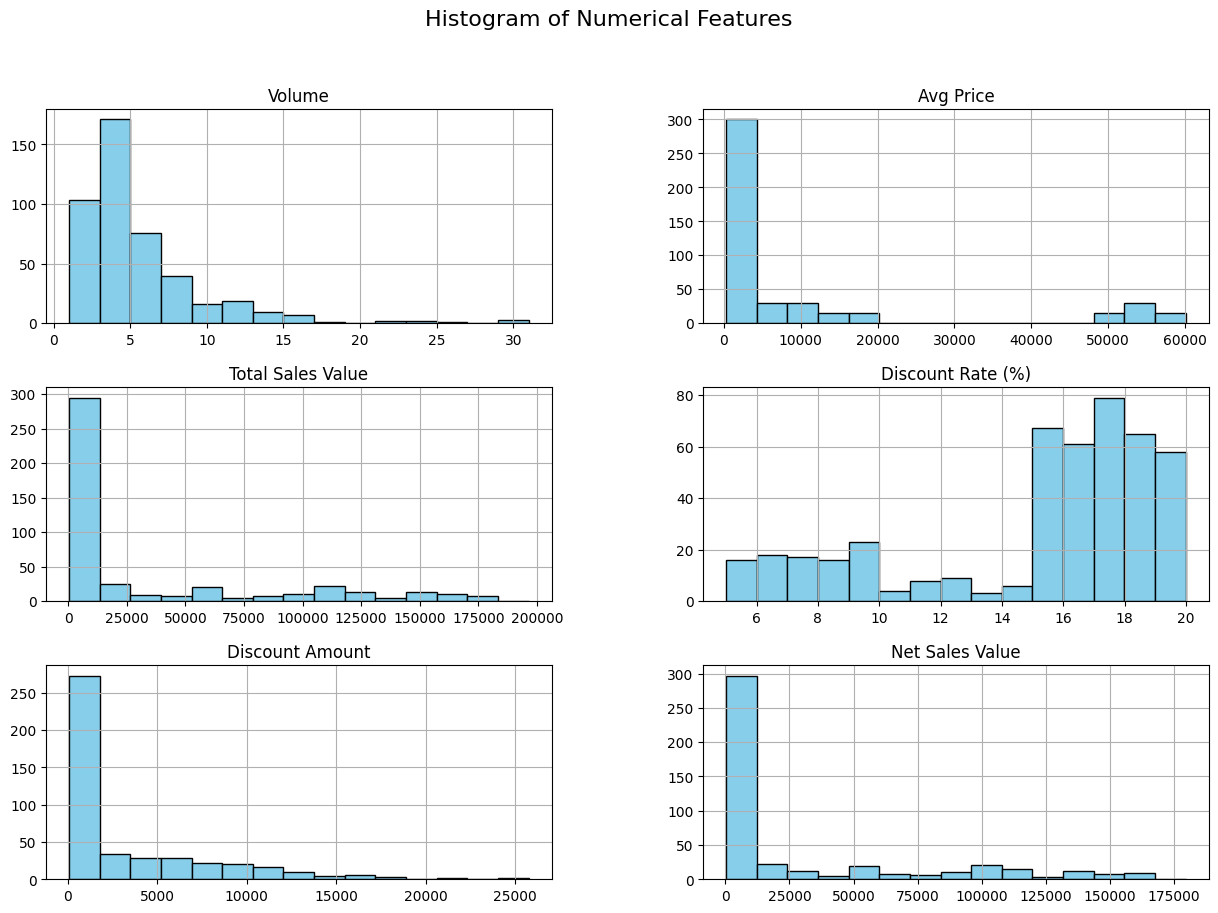

In [10]:
# Histograms
df[numerical_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.show()



checking outliers

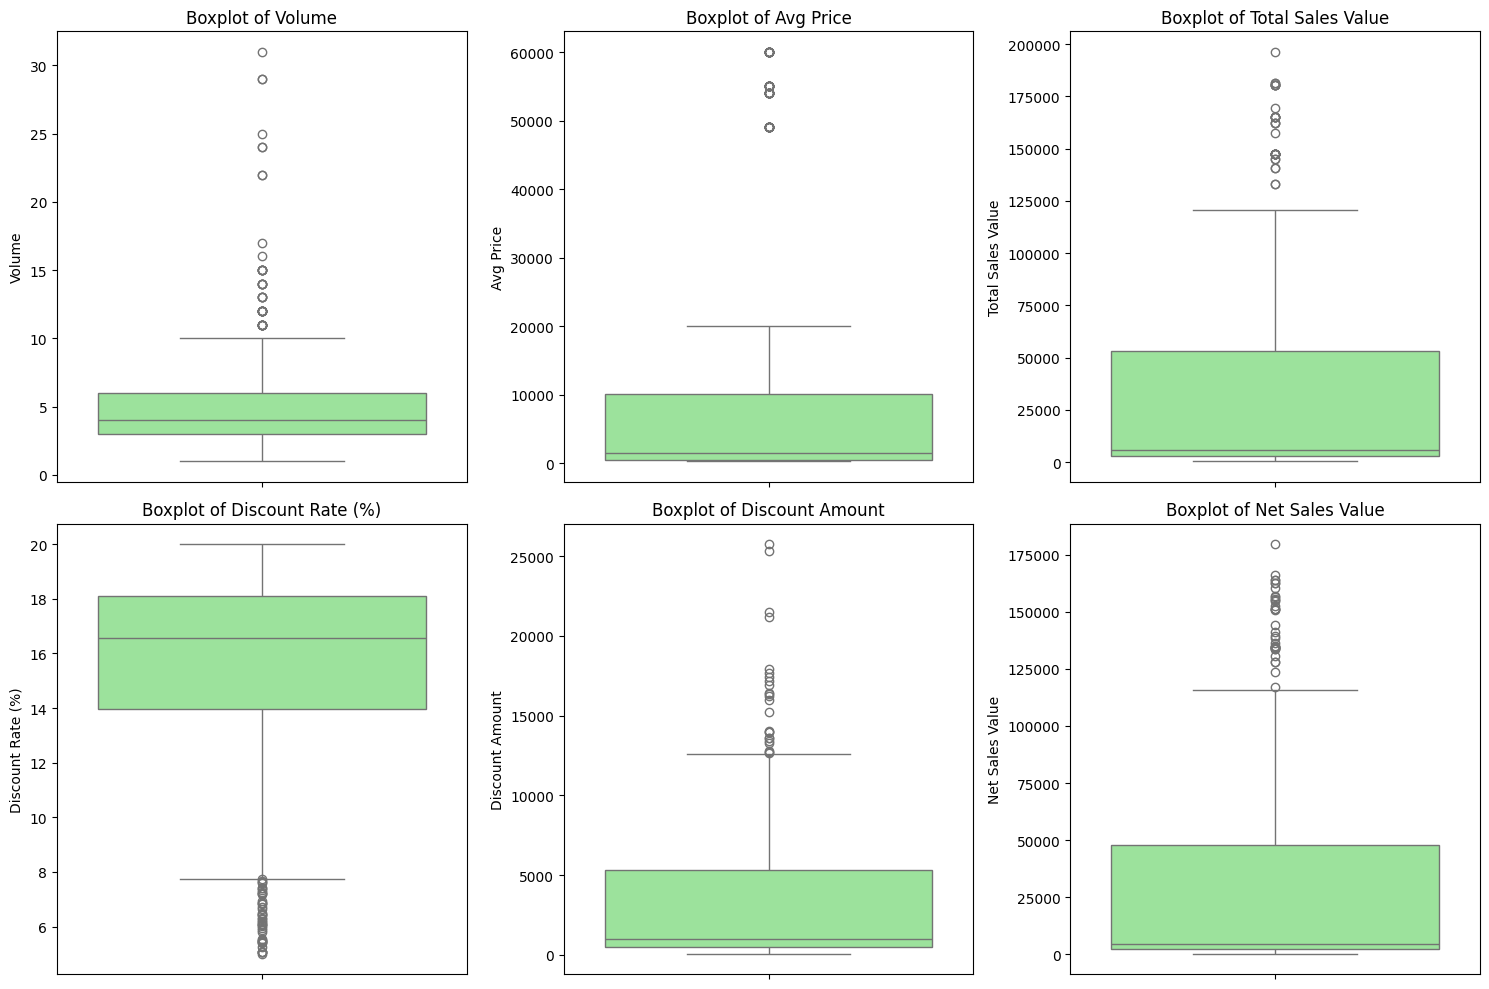

In [11]:
#box plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



<ipython-input-12-819a999e9c20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


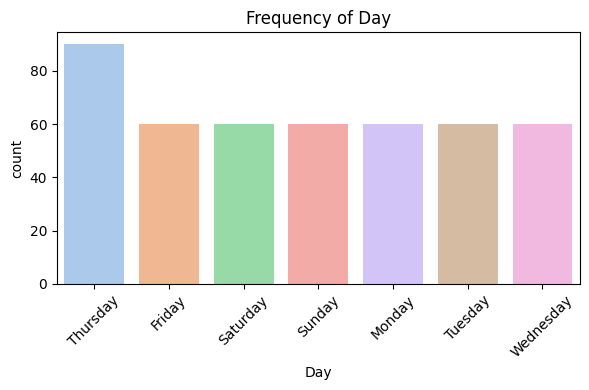

<ipython-input-12-819a999e9c20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


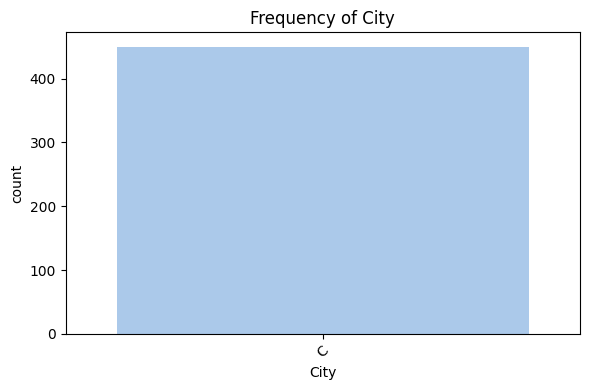

<ipython-input-12-819a999e9c20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


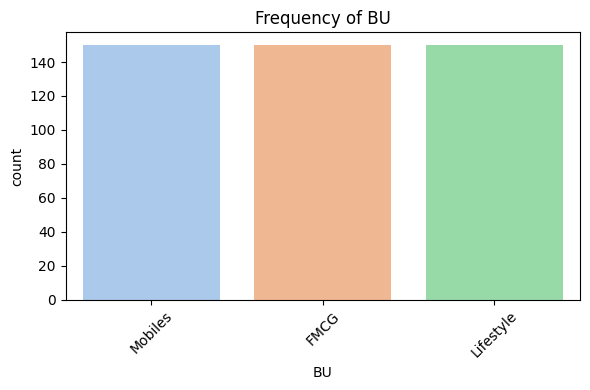

<ipython-input-12-819a999e9c20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


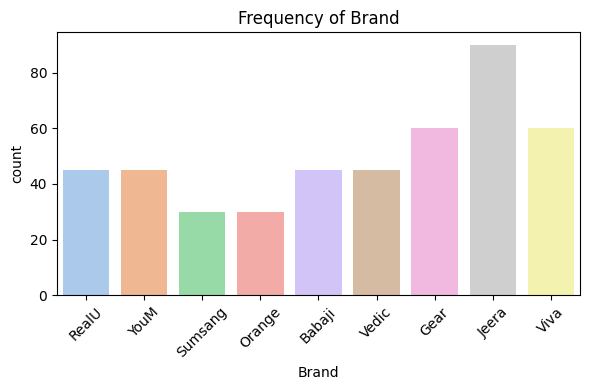

In [12]:
# Bar Charts for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [13]:
# Standardization
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [14]:
# Compare before and after standardization
print("\nBefore Standardization (first 5 rows):\n", df[numerical_cols].head())
print("\nAfter Standardization (first 5 rows):\n", df_standardized[numerical_cols].head())



Before Standardization (first 5 rows):
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  

After Standardization (first 5 rows):
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.6229

In [15]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df_standardized, columns=categorical_cols, drop_first=True)



In [16]:
# Display part of the transformed dataset
print("\nTransformed Dataset Preview (first 5 rows):\n")
print(df_encoded.head())



Transformed Dataset Preview (first 5 rows):

         Date  SKU    Volume       Model  Avg Price  Total Sales Value  \
0  01-04-2021  M01  2.350029       RU-10   0.091173           2.925721   
1  01-04-2021  M02  1.167129   RU-9 Plus  -0.019570           1.330995   
2  01-04-2021  M03  0.457388       YM-99   0.312659           1.562775   
3  01-04-2021  M04  0.220808  YM-99 Plus   0.534146           1.719276   
4  01-04-2021  M05 -0.488932      YM-98   -0.130313          -0.188452   

   Discount Rate (%)  Discount Amount  Net Sales Value  Day_Monday  ...  \
0          -0.830289         3.952816         2.804756       False  ...   
1          -0.852661         1.849014         1.271026       False  ...   
2          -1.351631         1.622995         1.545675       False  ...   
3          -1.949723         1.113807         1.765810       False  ...   
4           0.673739         0.227852        -0.227595       False  ...   

   BU_Lifestyle  BU_Mobiles  Brand_Gear  Brand_Jeera  Bran